In [2]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

# Creating the dataframes

In [3]:
MOVIELENS="movielens"

movies = pd.read_csv(os.path.join(MOVIELENS, 'movies.csv'), sep=',')
ratings = pd.read_csv(os.path.join(MOVIELENS, 'ratings.csv'), sep=',')

In [4]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


# Merging the two dataframes

In [6]:
movies_ratings = pd.merge(movies, ratings, how = 'left', on='movieId')
movies_ratings.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,8.904925e+08


# Cleaning the dataframe

In [7]:
movies.isna().any()

movieId    False
title      False
genres     False
dtype: bool

In [8]:
ratings.isna().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [9]:
movies_ratings.isna().any()

movieId      False
title        False
genres       False
userId        True
rating        True
timestamp     True
dtype: bool

The fact that some movies are not rated is important, so we will keep them in the dataframe

In [10]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2.0,3.5,1.141416e+09
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.0,4.0,1.439472e+09
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4.0,3.0,1.573944e+09
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5.0,4.0,8.586259e+08
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",8.0,4.0,8.904925e+08


In [11]:
movies_ratings_exploded = movies_ratings.explode('genres')
movies_ratings_exploded.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,2.0,3.5,1.141416e+09
0,1,Toy Story (1995),Animation,2.0,3.5,1.141416e+09
0,1,Toy Story (1995),Children,2.0,3.5,1.141416e+09
0,1,Toy Story (1995),Comedy,2.0,3.5,1.141416e+09
0,1,Toy Story (1995),Fantasy,2.0,3.5,1.141416e+09


In [12]:
genres_stats = movies_ratings_exploded.groupby('genres').agg({
    'rating':'mean',
    'userId':'count',
    'movieId': 'nunique'})
genres_stats.head(5)

,rating,userId,movieId
genres,,,
(no genres listed),3.326379,26627,5062
Action,3.466592,7446918,7348
Adventure,3.517445,5832424,4145
Animation,3.614946,1630987,2929
Children,3.432507,2124258,2935


In [13]:
#Changing columns names
genres_stats.columns = ['average_rating', 'num_vote', 'film_count']
genres_stats

,average_rating,num_vote,film_count
genres,,,
(no genres listed),3.326379,26627,5062
Action,3.466592,7446918,7348
Adventure,3.517445,5832424,4145
Animation,3.614946,1630987,2929
Children,3.432507,2124258,2935
Comedy,3.423993,8926230,16870
Crime,3.685044,4190259,5319
Documentary,3.705281,322449,5605
Drama,3.677185,10962833,25606


In [14]:
#Drop no-genres listed & IMAX (not real genres)
genres_stats = genres_stats.drop(['(no genres listed)', 'IMAX'])
genres_stats

,average_rating,num_vote,film_count
genres,,,
Action,3.466592,7446918,7348
Adventure,3.517445,5832424,4145
Animation,3.614946,1630987,2929
Children,3.432507,2124258,2935
Comedy,3.423993,8926230,16870
Crime,3.685044,4190259,5319
Documentary,3.705281,322449,5605
Drama,3.677185,10962833,25606
Fantasy,3.511589,2831585,2731


In [15]:
#Creating the column Genres and reset index
genres_stats = genres_stats.reset_index()
genres_stats.head(5)

,genres,average_rating,num_vote,film_count
0,Action,3.466592,7446918,7348
1,Adventure,3.517445,5832424,4145
2,Animation,3.614946,1630987,2929
3,Children,3.432507,2124258,2935
4,Comedy,3.423993,8926230,16870


Now, the dataframe is clean, and we will proceed with the genres_stats dataframe. Our aim is to build a BCG Matrix using average_rating to assess how much each genre is appreciated, and num_vote to evaluate its popularity. This will help us analyze the performance of the different genres. 

However, before, we need to calculate the correlation coefficient between the number of movies per genre and the number of votes. This will tell us whether normalization is necessary before constructing the BCG Matrix.

# Calculating the Correlation Coefficient

In [16]:
correlation = genres_stats['film_count'].corr(genres_stats['num_vote'])
print("Correlation coefficient :", correlation)

Correlation coefficient : 0.856500073303002


It's a very strong correlation. Let's see the visualization of the relationship with a scatter plot.

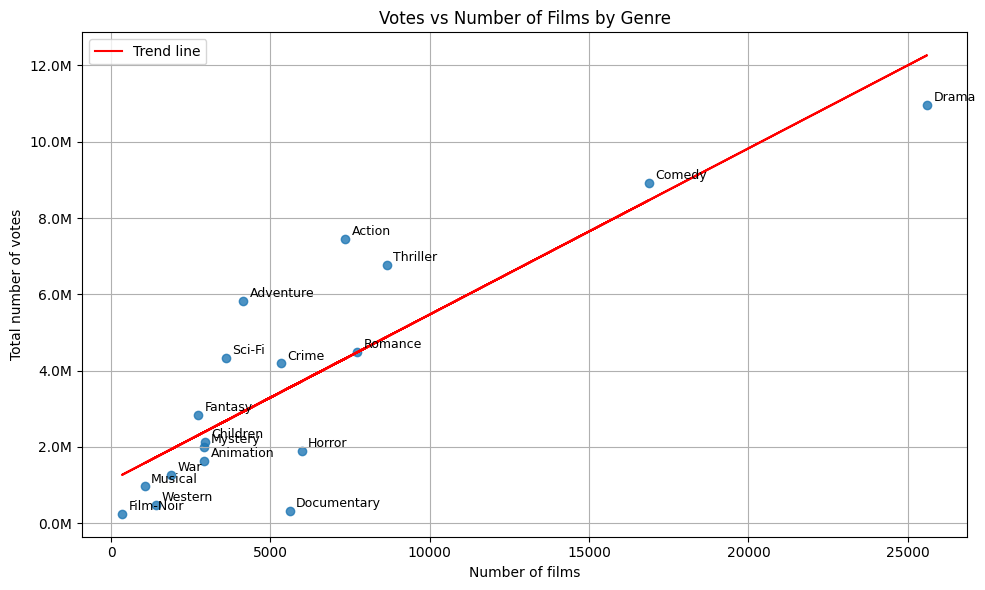

In [25]:
m, b = np.polyfit(genres_stats['film_count'], genres_stats['num_vote'], 1)

plt.figure(figsize=(10, 6))

plt.scatter(
    genres_stats['film_count'],
    genres_stats['num_vote'],
    alpha=0.8)

for i in genres_stats.index:
    plt.text(
        genres_stats.loc[i, 'film_count'] + 200,
        genres_stats.loc[i, 'num_vote'] + 100000,
        genres_stats.loc[i, 'genres'],
        fontsize=9)

# Adding the regression line
plt.plot(
    genres_stats['film_count'],
    m * genres_stats['film_count'] + b,
    color='red',
    linestyle='-',
    label='Trend line')

# Formating Y-axis labels in millions
yax = plt.gca()
yax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))

plt.xlabel('Number of films')
plt.ylabel('Total number of votes')
plt.title('Votes vs Number of Films by Genre')

plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Given the existence of this correlation, it may be worthwhile making a new BCG matrix to neutralize the fact that certain genres have more films, in order to obtain a more representative result. It's possible that some genres overperform or underperform according to what it's expected.

# BCG Matrix

In [18]:
# Normalizing popularity (votes per film)
genres_stats['votes_per_film'] = genres_stats['num_vote'] / genres_stats['film_count']

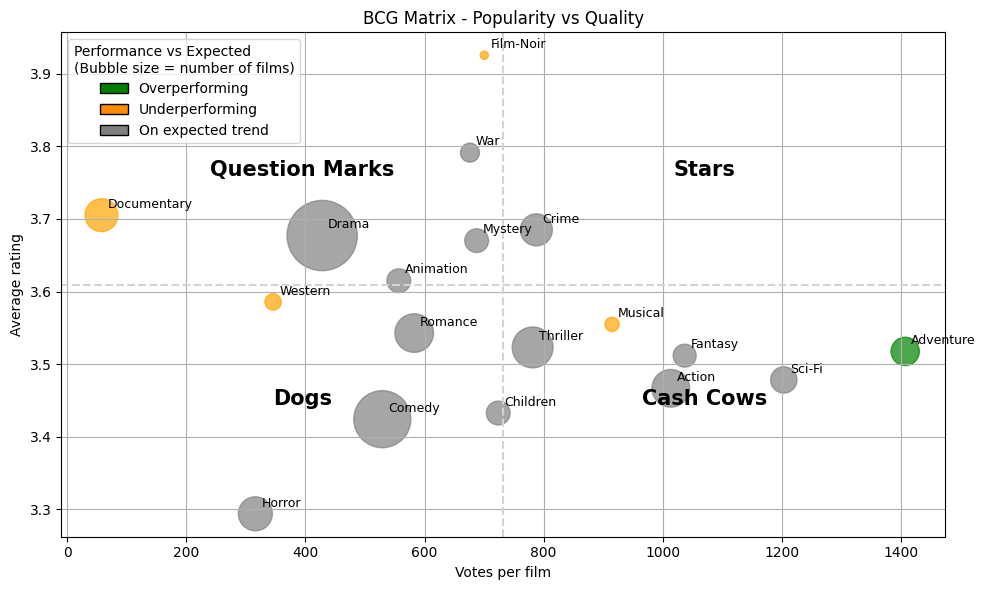

In [27]:
# Expected trend
m, b = np.polyfit(genres_stats['film_count'], genres_stats['num_vote'], 1)
genres_stats['expected_votes'] = m * genres_stats['film_count'] + b
genres_stats['expected_votes_per_film'] = genres_stats['expected_votes'] / genres_stats['film_count']

def assign_color(row):
    diff = row['votes_per_film'] - row['expected_votes_per_film']
    if diff > 500:
        return 'green'
    elif diff < -500:
        return 'orange'
    else:
        return 'gray'

genres_stats['color'] = genres_stats.apply(assign_color, axis=1)

# Center point for the visual quadrants
x_min, x_max = genres_stats['votes_per_film'].min(), genres_stats['votes_per_film'].max()
y_min, y_max = genres_stats['average_rating'].min(), genres_stats['average_rating'].max()
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

plt.figure(figsize=(10, 6))

plt.axhline(y=y_center, color='lightgray', linestyle='--')
plt.axvline(x=x_center, color='lightgray', linestyle='--')

plt.scatter(
    genres_stats['votes_per_film'],
    genres_stats['average_rating'],
    s=genres_stats['film_count'] * 0.1,
    alpha=0.7,
    c=genres_stats['color']
)

for i in genres_stats.index:
    plt.text(
        genres_stats.loc[i, 'votes_per_film'] + 10,
        genres_stats.loc[i, 'average_rating'] + 0.01,
        genres_stats.loc[i, 'genres'],
        fontsize=9
    )

legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Overperforming'),
    Patch(facecolor='darkorange', edgecolor='black', label='Underperforming'),
    Patch(facecolor='gray', edgecolor='black', label='On expected trend'),
]
plt.legend(
    handles=legend_elements,
    title='Performance vs Expected\n(Bubble size = number of films)',
    loc='upper left'
)

plt.text(
    x_center + (x_max - x_center) * 0.5,
    y_center + (y_max - y_center) * 0.5,
    'Stars',
    fontsize=15,
    fontweight ='bold',
    ha='center',
    va='center'
)

plt.text(
    x_center - (x_center - x_min) * 0.5,
    y_center + (y_max - y_center) * 0.5,
    'Question Marks',
    fontsize=15,
    fontweight ='bold',
    ha='center',
    va='center'
)

plt.text(
    x_center + (x_max - x_center) * 0.5,
    y_center - (y_center - y_min) * 0.5,
    'Cash Cows',
    fontsize=15,
    fontweight ='bold',
    ha='center',
    va='center'
)

plt.text(
    x_center - (x_center - x_min) * 0.5,
    y_center - (y_center - y_min) * 0.5,
    'Dogs',
    fontsize=15,
    fontweight ='bold',
    ha='center',
    va='center'
)

plt.xlabel('Votes per film')
plt.ylabel('Average rating')
plt.title('BCG Matrix - Popularity vs Quality')
plt.grid(True)
plt.tight_layout()
plt.show()


The previous visualization is a BCG matrix. Its purpose is to give us a visualization of the different genres. The size of the bubbles is defined by the number of films in that genre: the larger the bubble, the more films there are. The further to the right a genre is, the more votes it receives, and the further up a genre is, the better its score. It's important to note that this is a zoom between the 3.3 and 3.9 ratings, a difference of 0.6 points. This may not seem like much, but it corresponds to a range of 12%. Out of 10, there would be more than a one-point difference.

Quadrant overview : 
- Stars : Popular and well rated genres (top right)
- Question marks : Well rated and not popular (top left)
- Cash cows : popular but not well rated (bottom right)
- Dogs : not popular and not well rated (bottom right)

## Findings 
- Stars: popular and highly rated\
Crime is the only genre in this category.

- Cash Cows: very popular but lower quality\
Adventure outperforms (very popular , but lower rating).\
Action, Sci-Fi, Fantasy (mass-produced genres, highly visible, but with moderate quality , in line with expectations).\
Thriller, Musical (underperform despite decent production, they don't engage as much as might be expected).

- Question Marks: qualitative but not very popular \
War, Film-Noir, Documentary (well rated genres, but not very popular. They underperform despite their quality) \
Drama, Animation, Mystery (well positioned in terms of quality, but don't generate enough engagement for their volume). \
These genres represent opportunities to be activated through better promotion, distribution, or strategic repositioning.

- Dogs: unpopular and under-appreciated\
Horror, Western (genres with low ratings (~3.3) and few votes. Clearly underperforming).\
Comedy, Romance, Children (highly-produced genres that generate little individual value (low votes/film and average quality)).\
These genres should be streamlined, refocused or innovated to regain impact.
